# Import Necessary Library

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Reading Image Data

In [2]:
Parasitized_cell=os.listdir("C:\\Users\\telug\\OneDrive\\Desktop\DS\\IQGateway\\archive (2)\\cell_images\\Parasitized")

uninfected_cell=os.listdir("C:\\Users\\telug\\OneDrive\\Desktop\\DS\\IQGateway\\archive (2)\\cell_images\\Uninfected")

print("parasitized cell:",len(Parasitized_cell))
print("Uninfcted cell:",len(uninfected_cell))

parasitized cell: 13780
Uninfcted cell: 13780


# Visualization Cell Images

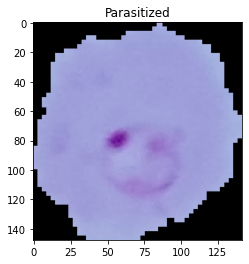

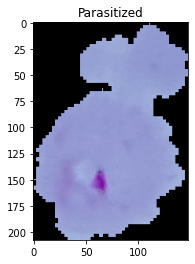

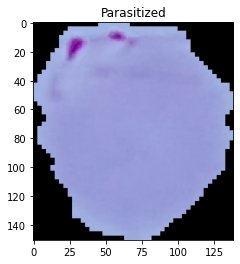

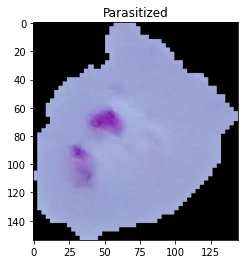

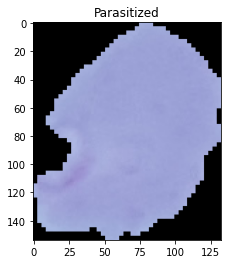

In [3]:
for i in range(5):
    img=cv2.imread('C:\\Users\\telug\\OneDrive\\Desktop\DS\\IQGateway\\archive (2)\\cell_images\\Parasitized/'+Parasitized_cell[i])
    plt.imshow(img)
    plt.title("Parasitized")
    plt.show()

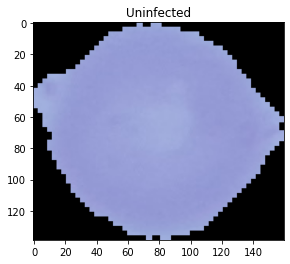

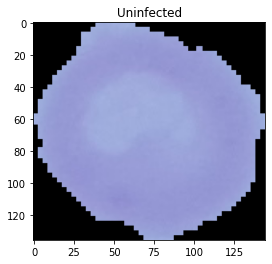

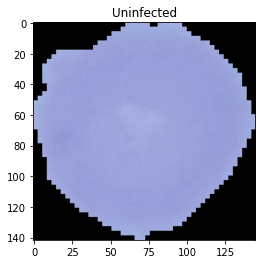

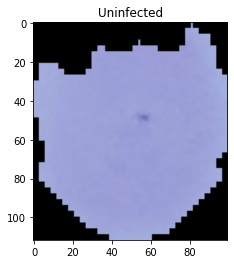

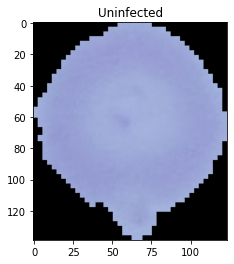

In [4]:
for i in range(5):
    img=cv2.imread('C:\\Users\\telug\\OneDrive\\Desktop\\DS\\IQGateway\\archive (2)\\cell_images\\Uninfected/'+uninfected_cell[i])
    plt.imshow(img)
    plt.title("Uninfected")
    plt.show()

# Resizeing the cell images

In [5]:
width = 68
height = 68

# Splitting Dataset

Before feeding cell images to the neural network we have to rescale all the images into same scale you know highest pixel of a image is 255 if we divide all our images into 255 our cell images was scale into 0 and 1 .If we are not scalling our images reducing loss will take more time.

In [6]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing Train and Test data Generator

In [7]:
trainDatagen = datagen.flow_from_directory(directory="C:\\Users\\telug\\OneDrive\\Desktop\\DS\\IQGateway\\archive (2)\cell_images",
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


# It will automatically assign label

In [8]:
trainDatagen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [9]:
valDatagen = datagen.flow_from_directory(directory="C:\\Users\\telug\\OneDrive\\Desktop\\DS\\IQGateway\\archive (2)\cell_images",
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


# Creating CNN Model

In [10]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(width,height,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 66, 66, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 33, 33, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 64)        0

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history=model.fit_generator(generator=trainDatagen,
                            steps_per_epoch=len(trainDatagen),
                            epochs=6,
                            validation_data=valDatagen ,
                            validation_steps=len(valDatagen )
                           )

Epoch 1/6


C:\Users\telug\AppData\Local\Temp\ipykernel_14668\961808951.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=trainDatagen,


1378/1378 [==============================] - 82s 59ms/step - loss: 0.5410 - accuracy: 0.7225 - val_loss: 0.2521 - val_accuracy: 0.9216
Epoch 2/6
1378/1378 [==============================] - 77s 56ms/step - loss: 0.2463 - accuracy: 0.9202 - val_loss: 0.2045 - val_accuracy: 0.9321
Epoch 3/6
1378/1378 [==============================] - 80s 58ms/step - loss: 0.2170 - accuracy: 0.9283 - val_loss: 0.1982 - val_accuracy: 0.9339
Epoch 4/6
1378/1378 [==============================] - 86s 63ms/step - loss: 0.1994 - accuracy: 0.9349 - val_loss: 0.1906 - val_accuracy: 0.9323
Epoch 5/6
1378/1378 [==============================] - 84s 61ms/step - loss: 0.1845 - accuracy: 0.9424 - val_loss: 0.1827 - val_accuracy: 0.9387
Epoch 6/6
1378/1378 [==============================] - 85s 61ms/step - loss: 0.1696 - accuracy: 0.9478 - val_loss: 0.1714 - val_accuracy: 0.9392


# Ploting Accuracy Of Our Model

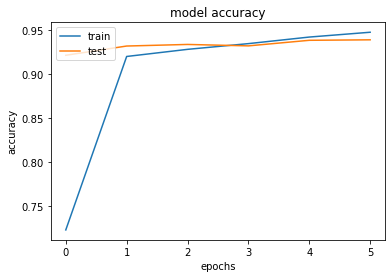

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

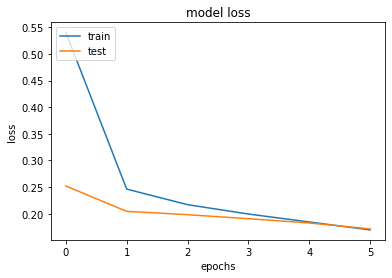

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model.h5')

# Testing Our Model

In [17]:
testimg_path="../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png"
img=image.load_img(testimg_path,target_size=(68,68))
plt.imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
if val==0:
    plt.title("Paracitized")
else:
    plt.title("Uninfected")

FileNotFoundError: [Errno 2] No such file or directory: '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png'